# Analysis of Critic Reviews from Nexis Uni

Hello! In this data analysis notebook, I am going to explore and analyze the critic reviews that I downloaded, cleaned, and organized from Nexis Uni. 

Background info: I was originally planning on web scraping the critic reviews from [Rotten Tomatoes](https://www.rottentomatoes.com/) and [Metacritic](https://www.metacritic.com/), however, when I tried doing this, many of the links to the full critic reviews were either blocked with a paywall or the pages did not exist anymore. Therefore, I made the conscious decision to retrieve my critic reviews from [Nexis Uni](nexisuni.com.proxy.library.upenn.edu), which is an easy-to-use academic search engine that delivers relevant content to make scholarly research more efficient, through my UPenn student account. For the specific search queries and the steps I took on how to collect this data for both movies, please refer to the following 2 notebooks: `nexis_host_critic` and `nexis_parasite_critic`.

This notebook here will be split into 2 parts, the first part for sentiment analysis and the second part for word and n-gram frequency list analysis.

With each part, the analysis will be carried out for critic reviews of _The Host_ and of _Parasite_ , and hopefully I can gain some insight into whether reviews of _Parasite_ generally express higher sentiment scores than those of _The Host_ . My end goal is also to compare the sentiment scores among critic reviews and user reviews. It will be intriguing to see whether there is a difference between the two groups. 

Let's get started!

### Set-up

In [1]:
import time
import json
from nltk.corpus import stopwords
import random
import re
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from collections import Counter

In [2]:
chars_to_remove = '.,!?/()'

In [3]:
%run functions.ipynb

## Analysis pt. 1: Sentiment analysis using VADER

In [4]:
sid = SentimentIntensityAnalyzer()

### Analyzing critic reviews of _The Host_ 

In [5]:
nexis_host = json.load(open('../data/critic_reviews/nexis_host_critic.json'))

In [6]:
len(nexis_host)

27

In [7]:
nexis_host[:3]

[{'text': 'Mar. 8, 2007 (Blogcritics.org delivered by Newstex) -- \n If there.s one film that will plant South Korean cinema into the mind of the American public, The Host is it. Bong Joon-ho.s lively feature provides all the thrills and sensation of the average American summer spectacle, except that it does so while still remaining a good movie. It.s got heart, hilarity, triumph and tragedy as it gives us a fractured family that finally sets aside their differences and unites towards a common goal. It.s also got a giant mutant fish-monster that tries to eat everything in its path.\n\nStill with me? That.s the kind of film that The Host is - able to shift tones on a moment.s notice (often within the same scene), Bong uses all his formidable talents to bring respect to a disreputable genre. And thanks to his sure hand, somehow it all comes together.\n\nThe genesis of this giant mutant fish-monster comes in the year 2000 prologue, when an American government official, over the objections

Before I initialize using VADER for analysis, in which I'll tokenize the text and VADER will go through and score each word, I want to create a list of stop words that I do NOT want VADER to score. This is because there are words that are not about the reviewer's opinion, sentiment, or subjective thoughts, but rather about the plot of the movie or certain film characteristics.

Here's the list of words I do NOT want VADER to analyze (and this will remain the same for all the other review data where I'm running SA):

In [8]:
words_to_remove = ['monster','virus','expand','host','movie','kill','Expand','parasite','movie','sucks',
    'poor','struggles','hard','horror','military','government','black','shot','violent','violence','warfare',
    'money', 'poverty','inequality','hype','creature','mutant','beast','lower','mother','waste']

Setting up sentiment analysis for the critic reviews of _The Host_ :

In [9]:
for review in nexis_host:
    tokens = tokenize(review['text'], lowercase=True, strip_chars=chars_to_remove)
    filtered_tokens = [t for t in tokens if t not in words_to_remove]
    review['tokens']=filtered_tokens

In [10]:
nexis_host[0]

{'text': 'Mar. 8, 2007 (Blogcritics.org delivered by Newstex) -- \n If there.s one film that will plant South Korean cinema into the mind of the American public, The Host is it. Bong Joon-ho.s lively feature provides all the thrills and sensation of the average American summer spectacle, except that it does so while still remaining a good movie. It.s got heart, hilarity, triumph and tragedy as it gives us a fractured family that finally sets aside their differences and unites towards a common goal. It.s also got a giant mutant fish-monster that tries to eat everything in its path.\n\nStill with me? That.s the kind of film that The Host is - able to shift tones on a moment.s notice (often within the same scene), Bong uses all his formidable talents to bring respect to a disreputable genre. And thanks to his sure hand, somehow it all comes together.\n\nThe genesis of this giant mutant fish-monster comes in the year 2000 prologue, when an American government official, over the objections 

In [11]:
for review in nexis_host:
    text = ' '.join(review['tokens'])
    scores = sid.polarity_scores(text)
    review.update(scores)

In [12]:
text

"magnolia street: july 24 prebook: june 26 > unusual foreign mix of and family dramedy the most successful and expensive korean film ever produced received terrific reviews and brisk arthouse business in the us and it's easy to see why for this is not only a dazzling technical achievement but a surprisingly complex affair spiked with political satire and pathos that also happens to be quite funny think jaws meets little miss sunshine and you get an idea of what to expect from a wherein a teenage girl is wrested away from her family snack shop near the han river by a gigantic amphibious the girl's fractured family-which includes a slacker father and an aunt who happens to be an archery expert-has to put aside their differences to track her down before it's too late at the same time the claims the is the product of a mysterious and begins putting citizens into quarantine which puts a big crimp in the clan's rescue plans director joon ho-bong memories of murder does a miraculous job juggl

In [13]:
nexis_host[0]

{'compound': -0.6895,
 'neg': 0.092,
 'neu': 0.812,
 'pos': 0.096,
 'text': 'Mar. 8, 2007 (Blogcritics.org delivered by Newstex) -- \n If there.s one film that will plant South Korean cinema into the mind of the American public, The Host is it. Bong Joon-ho.s lively feature provides all the thrills and sensation of the average American summer spectacle, except that it does so while still remaining a good movie. It.s got heart, hilarity, triumph and tragedy as it gives us a fractured family that finally sets aside their differences and unites towards a common goal. It.s also got a giant mutant fish-monster that tries to eat everything in its path.\n\nStill with me? That.s the kind of film that The Host is - able to shift tones on a moment.s notice (often within the same scene), Bong uses all his formidable talents to bring respect to a disreputable genre. And thanks to his sure hand, somehow it all comes together.\n\nThe genesis of this giant mutant fish-monster comes in the year 2000 p

### Analyzing critic reviews of _Parasite_ 

In [14]:
nexis_parasite = json.load(open('../data/critic_reviews/nexis_parasite_critic.json'))

In [15]:
len(nexis_parasite)

261

In [16]:
nexis_parasite[0]

{'text': "Jan 27, 2020( The Cheat Sheet: http://www.cheatsheet.com/ Delivered by Newstex)  Parasite[1] is taking Hollywood by storm[2] this award season. In fact, the South Korean release is gearing up as a Best Picture frontrunner[3] heading into Oscars 2020. Director Bong Joon-ho's latest film defies genre to tell a complex story about two interconnected families and, by extension, delivers some crucial social commentary[4].With Parasite#8216;s success, we're sure moviegoers will be interested to see some of Bong's previous work. Prior to his Oscar-nominated hit[5], the director had made six films. Here's a quick breakdown of the features he has directed throughout his career. \n Bong Joon-ho and the cast of #8216;Parasite' at the Screen ActorsGuild Awards | John Sciulli/Getty Images for Turner#8216;Barking Dogs Never Bite' (2000)Barking Dogs Never Bite (Trailer)[6]In his 2000 directorial debut, Bong already aimed to combine genres in an innovative way. This dark comedy-drama follows

In [17]:
for review in nexis_parasite:
    tokens = tokenize(review['text'], lowercase=True, strip_chars=chars_to_remove)
    filtered_toks = [t for t in tokens if t not in words_to_remove]
    review['tokens']=filtered_toks

In [18]:
nexis_parasite[0]

{'text': "Jan 27, 2020( The Cheat Sheet: http://www.cheatsheet.com/ Delivered by Newstex)  Parasite[1] is taking Hollywood by storm[2] this award season. In fact, the South Korean release is gearing up as a Best Picture frontrunner[3] heading into Oscars 2020. Director Bong Joon-ho's latest film defies genre to tell a complex story about two interconnected families and, by extension, delivers some crucial social commentary[4].With Parasite#8216;s success, we're sure moviegoers will be interested to see some of Bong's previous work. Prior to his Oscar-nominated hit[5], the director had made six films. Here's a quick breakdown of the features he has directed throughout his career. \n Bong Joon-ho and the cast of #8216;Parasite' at the Screen ActorsGuild Awards | John Sciulli/Getty Images for Turner#8216;Barking Dogs Never Bite' (2000)Barking Dogs Never Bite (Trailer)[6]In his 2000 directorial debut, Bong already aimed to combine genres in an innovative way. This dark comedy-drama follows

In [19]:
for review in nexis_parasite:
    text = ' '.join(review['tokens'])
    scores = sid.polarity_scores(text)
    review.update(scores)

In [20]:
text

"jan 19 2020 the wrap: http:wwwthewrapcom delivered by newstex several best picture oscar contenders got a box office boost from their nominations this weekend including neon's 'parasite' and searchlight's 'jojo rabbit' both of which had their theater counts significantly expanded to accommodate renewed audience interest 'parasite' expanded by nearly 500 screens to 843 locations adding $21 million over the 4-day weekend to bring its total to $281 million the bong joon-ho film became the first korean ever to earn a nomination for best picture and took six nominations in all including best international film best director and best original screenplay 'jojo rabbit' meanwhile added 895 screens to bring its total to 1005 the largest expansion of any oscar contender the result is a $18 million total over the 4-day weekend bringing its total to $238 million 'jojo rabbit' was one of two films that scarlett johansson earned oscar nominations for taking a best supporting actress nod for her work

In [21]:
nexis_parasite[0]

{'compound': 0.9945,
 'neg': 0.052,
 'neu': 0.825,
 'pos': 0.123,
 'text': "Jan 27, 2020( The Cheat Sheet: http://www.cheatsheet.com/ Delivered by Newstex)  Parasite[1] is taking Hollywood by storm[2] this award season. In fact, the South Korean release is gearing up as a Best Picture frontrunner[3] heading into Oscars 2020. Director Bong Joon-ho's latest film defies genre to tell a complex story about two interconnected families and, by extension, delivers some crucial social commentary[4].With Parasite#8216;s success, we're sure moviegoers will be interested to see some of Bong's previous work. Prior to his Oscar-nominated hit[5], the director had made six films. Here's a quick breakdown of the features he has directed throughout his career. \n Bong Joon-ho and the cast of #8216;Parasite' at the Screen ActorsGuild Awards | John Sciulli/Getty Images for Turner#8216;Barking Dogs Never Bite' (2000)Barking Dogs Never Bite (Trailer)[6]In his 2000 directorial debut, Bong already aimed to c

### Comparing compound sentiment scores between the critic reviews 

In [22]:
len(nexis_host)

27

In [23]:
len(nexis_parasite)

261

In [24]:
# Mean compound sentiment score for reviews of The Host:
sum([review['compound'] for review in nexis_host]) / len(nexis_host)

0.10794074074074073

In [25]:
# Mean compound sentiment score for reviews of Parasite:
sum([review['compound'] for review in nexis_parasite]) / len(nexis_parasite)

0.8778651340996163

In [26]:
# Setting up for sns plots:
host_cs = [review['compound'] for review in nexis_host]
parasite_cs = [review['compound'] for review in nexis_parasite]

<AxesSubplot:>

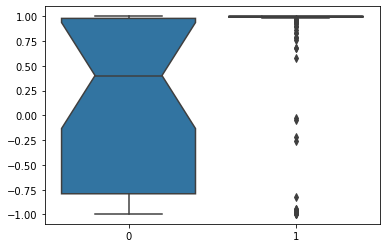

In [27]:
# Box plot:
sns.boxplot(data=[host_cs, parasite_cs], notch=True)

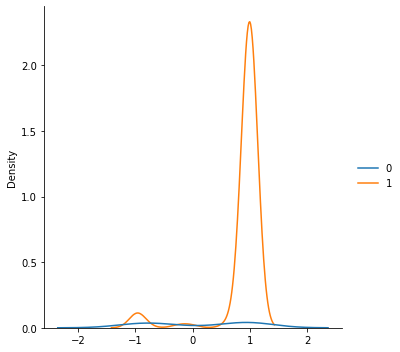

In [28]:
# Dis plot:
sns.displot(data=[host_cs, parasite_cs], kind='kde')

### Observations

* It's not really a valid comparison since there was such a large discrepancy between the number of critic reviews for _The Host_ (27) and the number of critic reviews for _Parasite_ (261). 
* We probably cannot make any extensive or significant observations due to the fact that there's a big discrepancy in the data sizes. However, this in and of itself is a noteworthy observation: there is a lot more "buzz" around _Parasite_ , hence there are hundreds of reviews written about this 2019 film across newspapers, blogs, magazines, and more. On the other hand, the fact that _The Host_ was not written about as much, tells us that there was arguably less attention devoted to this 2007 film by film critics. 

## Analysis pt. 2: Word and n-gram frequency list analysis of critic reviews

From the previous analysis pt. 1 with sentiment analysis, I was able to get a brief and general overview of the mean compound sentiment scores and compare those scores between reviews of the two movies. To go further into the textual analysis, I want to see if I can analyze word, bigram (two-word phrases), and trigram (three-word phrases) frequency lists and see if any patterns arise for the top words, bigrams, and trigrams across the reviews. With the observations I make from this analysis in pt. 2 of this notebook, I can gain a better understanding of what kinds of words and phrases are being used in each of our two data groups!

### Critic reviews of _The Host_

We will start with looking at which words, bigrams, and trigrams are most frequently used in the critic reviews of _The Host_ that I have collected!

In [29]:
# Looking at the data structure of our list of reviews:
nexis_host[:3]

[{'compound': -0.6895,
  'neg': 0.092,
  'neu': 0.812,
  'pos': 0.096,
  'text': 'Mar. 8, 2007 (Blogcritics.org delivered by Newstex) -- \n If there.s one film that will plant South Korean cinema into the mind of the American public, The Host is it. Bong Joon-ho.s lively feature provides all the thrills and sensation of the average American summer spectacle, except that it does so while still remaining a good movie. It.s got heart, hilarity, triumph and tragedy as it gives us a fractured family that finally sets aside their differences and unites towards a common goal. It.s also got a giant mutant fish-monster that tries to eat everything in its path.\n\nStill with me? That.s the kind of film that The Host is - able to shift tones on a moment.s notice (often within the same scene), Bong uses all his formidable talents to bring respect to a disreputable genre. And thanks to his sure hand, somehow it all comes together.\n\nThe genesis of this giant mutant fish-monster comes in the year 2

To carry out word and n-gram frequency list analysis, I will take the tokenized text of each review, and create and update the frequency lists by using the `Counter` function.

In [30]:
# Creating frequency lists (word - 1, bigram - 2, trigram - 3), 
# Taking the tokens from each review,
# Taking bigrams and trigrams from those tokens,
# And then updating the 3 frequency lists:

host_dist = Counter()
host_bigram_dist = Counter()
host_trigram_dist = Counter()
for review in nexis_host:
    host_toks = review['tokens']
    host_bigrams = get_ngram_tokens(host_toks, 2)
    host_trigrams = get_ngram_tokens(host_toks, 3)
    host_dist.update(host_toks)
    host_bigram_dist.update(host_bigrams)
    host_trigram_dist.update(host_trigrams)

Here are the top 30 most frequently used words in reviews of _The Host_ :

In [31]:
host_dist.most_common(30)

[('the', 1540),
 ('a', 674),
 ('of', 646),
 ('and', 635),
 ('to', 515),
 ('is', 379),
 ('in', 363),
 ('that', 198),
 ('it', 197),
 ('on', 188),
 ('as', 186),
 ('with', 175),
 ('its', 146),
 ('or', 133),
 ('but', 133),
 ('film', 130),
 ('this', 121),
 ('at', 119),
 ('from', 119),
 ('for', 119),
 ('by', 108),
 ('are', 108),
 ('his', 105),
 ('an', 103),
 ('not', 97),
 ('be', 96),
 ('newstex', 88),
 ('has', 73),
 ('bong', 71),
 ('such', 67)]

And here are the top 30 bigrams:

In [32]:
host_bigram_dist.most_common(30)

[('of the', 189),
 ('in the', 96),
 ('to the', 68),
 ('is a', 59),
 ('and the', 54),
 ('of a', 54),
 ('on the', 51),
 ('the film', 51),
 ('from the', 46),
 ('the is', 40),
 ('at the', 40),
 ('its re-distributors', 40),
 ('blogs via', 40),
 ('via newstex', 40),
 ('with the', 33),
 ('in a', 33),
 ('"the host"', 32),
 ('han river', 31),
 ('is the', 31),
 ('as the', 31),
 ('the han', 29),
 ('with a', 27),
 ('to be', 26),
 ('into the', 25),
 ('that the', 25),
 ('bong joon-ho', 25),
 ('by newstex', 24),
 ('such blogs', 24),
 ('it is', 24),
 ('about the', 24)]

And finally, the top 30 trigrams:

In [33]:
host_trigram_dist.most_common(30)

[('blogs via newstex', 40),
 ('the han river', 20),
 ('newstex and its', 16),
 ('and its re-distributors', 16),
 ('newstex or its', 16),
 ('or its re-distributors', 16),
 ('on such blogs', 16),
 ('such blogs via', 16),
 ('via newstex shall', 16),
 ('one of the', 12),
 ('of the river', 12),
 ('of the film', 10),
 ('the is a', 10),
 ('out of the', 9),
 ("seoul's han river", 9),
 ('delivered by newstex', 8),
 ('by newstex --', 8),
 ('this is a', 8),
 ('notes the views', 8),
 ('the views expressed', 8),
 ('views expressed on', 8),
 ('expressed on blogs', 8),
 ('on blogs distributed', 8),
 ('blogs distributed by', 8),
 ('distributed by newstex', 8),
 ('by newstex and', 8),
 ('its re-distributors "blogs', 8),
 ('re-distributors "blogs via', 8),
 ('"blogs via newstex"', 8),
 ('via newstex" are', 8)]

### Observations

* The word `bong` (Director Bong) doesn't show up as frequently as I expected! Perhaps because in 2007, not many American movie-watchers knew of him?
* Director Bong's full name does appear on the top 30 list for most common bigrams
* There's also many occurrences of `han river` and `the han river`, showing much attention to the location of the movie.

### Critic reviews of _Parasite_

Now we can move onto analyzing the word and n-gram frequency lists for reviews of _Parasite_ and this will follow the same exact structure as what we did above with the reviews of _The Host_ . 

In [34]:
# Looking at the data structure:
nexis_parasite[:3]

[{'compound': 0.9945,
  'neg': 0.052,
  'neu': 0.825,
  'pos': 0.123,
  'text': "Jan 27, 2020( The Cheat Sheet: http://www.cheatsheet.com/ Delivered by Newstex)  Parasite[1] is taking Hollywood by storm[2] this award season. In fact, the South Korean release is gearing up as a Best Picture frontrunner[3] heading into Oscars 2020. Director Bong Joon-ho's latest film defies genre to tell a complex story about two interconnected families and, by extension, delivers some crucial social commentary[4].With Parasite#8216;s success, we're sure moviegoers will be interested to see some of Bong's previous work. Prior to his Oscar-nominated hit[5], the director had made six films. Here's a quick breakdown of the features he has directed throughout his career. \n Bong Joon-ho and the cast of #8216;Parasite' at the Screen ActorsGuild Awards | John Sciulli/Getty Images for Turner#8216;Barking Dogs Never Bite' (2000)Barking Dogs Never Bite (Trailer)[6]In his 2000 directorial debut, Bong already aimed

In [35]:
# Creating frequency lists (word, bigram, trigram), 
# Taking the tokens from each review,
# Taking bigrams and trigrams from those tokens,
# And then updating the 3 frequency lists:

parasite_dist = Counter()
parasite_bigram_dist = Counter()
parasite_trigram_dist = Counter()
for review in nexis_parasite:
    parasite_toks = review['tokens']
    parasite_bigrams = get_ngram_tokens(parasite_toks, 2)
    parasite_trigrams = get_ngram_tokens(parasite_toks, 3)
    parasite_dist.update(parasite_toks)
    parasite_bigram_dist.update(parasite_bigrams)
    parasite_trigram_dist.update(parasite_trigrams)

Now, let's look at the top 30 most frequently used words:

In [36]:
parasite_dist.most_common(30)

[('the', 14375),
 ('a', 6322),
 ('and', 6215),
 ('of', 6013),
 ('to', 5084),
 ('in', 4616),
 ('for', 2679),
 ('is', 2654),
 ('that', 2275),
 ('with', 1984),
 ('film', 1933),
 ('it', 1900),
 ('on', 1852),
 ('as', 1730),
 ('best', 1398),
 ('this', 1338),
 ('by', 1267),
 ('at', 1255),
 ('was', 1228),
 ('his', 1226),
 ('but', 1150),
 ('an', 1008),
 ('from', 959),
 ('are', 958),
 ('bong', 927),
 ('he', 902),
 ('has', 854),
 ('i', 854),
 ('be', 832),
 ('their', 796)]

And the top 30 most frequently used bigrams:

In [37]:
parasite_bigram_dist.most_common(30)

[('of the', 1516),
 ('in the', 1059),
 ('at the', 590),
 ('the film', 562),
 ('for the', 477),
 ('and the', 474),
 ('to the', 442),
 ('in a', 440),
 ('on the', 397),
 ('best picture', 372),
 ('of a', 371),
 ('with the', 330),
 ('is a', 314),
 ('the first', 304),
 ('to be', 298),
 ('with a', 270),
 ('for a', 255),
 ('the best', 255),
 ('as a', 251),
 ('from the', 251),
 ('one of', 249),
 ('is the', 240),
 ('as the', 220),
 ('it was', 214),
 ('for best', 210),
 ('south korean', 204),
 ('it is', 197),
 ('bong joon', 194),
 ('by the', 193),
 ('about the', 175)]

And finally, the top 30 most frequently used trigrams:

In [38]:
parasite_trigram_dist.most_common(30)

[('one of the', 168),
 ('upon a time', 122),
 ('a time in', 109),
 ('bong joon ho', 105),
 ("the palme d'or", 90),
 ('the kim family', 78),
 ("bong joon ho's", 78),
 ('a lot of', 73),
 ('cannes film festival', 69),
 ('the united states', 65),
 ('the academy awards', 65),
 ('in the film', 64),
 ('once upon a', 61),
 ('as well as', 60),
 ('foreign language film', 60),
 ('the new york', 60),
 ('delivered by newstex', 56),
 ('film to win', 56),
 ('best international feature', 55),
 ('the film is', 55),
 ('best original screenplay', 54),
 ('new york times', 54),
 ('for best picture', 53),
 ('time in hollywood', 51),
 ('of the most', 51),
 ('in south korea', 50),
 ('the story of', 49),
 ('of the film', 49),
 ('win best picture', 49),
 ('to win best', 48)]

### Observations

For reviews of _Parasite_ the trigram frequency list shows a lot of emphasis on the awards that the movie won. So one theme in this list would be `win` or `awards`. As we can see, there are trigrams in the top 30 list that include:
* `cannes film festival`
* `the academy awards`
* `film to win`
* `best international feature`
* `for best picture`
* `best original screenplay`
* `win best picture`
* `to win best`
* `at the oscars`

What's also very notable is that for the trigram frequency list again, we see more emphasis on the movie's presence in America, so the second theme would be `USA`. These include the following phrases in the top 30 list:
* `the united states`
* `the new york`
* `time in hollywood`

## Conclusion

In this notebook, I was able to run both sentiment analysis (using VADER) and frequency analysis on the critic reviews of both movies. Overall, the sentiment analysis shows that there were higher average positive sentiment scores for critic reviews of _Parasite_ than _The Host_ and this supports my hypothesis that _Parasite_ was more well-received. 

One thing I'll have to note is that VADER does have its limitations, since it only focuses on individual words and therefore the context or nuances of language might be lost. Therefore, I'll try running the same kind of sentiment analysis for these reviews using another Python NLP processor called TextBlob, which has its own sentiment analyzer. I will explore this in the notebook titled `trying_TextBlob_SA`, so make sure to check that out too! 

Overall, this notebook was helpful for making broad conclusions about the critic reviews. Let's move onto analyzing user reviews in the other notebooks with titles starting with `analysis`...! Thanks!